# Mriežky (Grids)

Mriežka predstavuje univerzálny nástroj pre porovnanie viacerých typov grafov umiestnených do mriežky pozostávajúcej z viacerých riadkov a stĺpcov.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## PairGrid

*Pairgrid* použijeme ako základ pre zakreslenie vzťahov medzi atribútmi dátového súboru.

In [4]:
# Just the Grid
sns.PairGrid(tips)

Následne môžeme priradiť do mriežky niektorý z typov grafov.

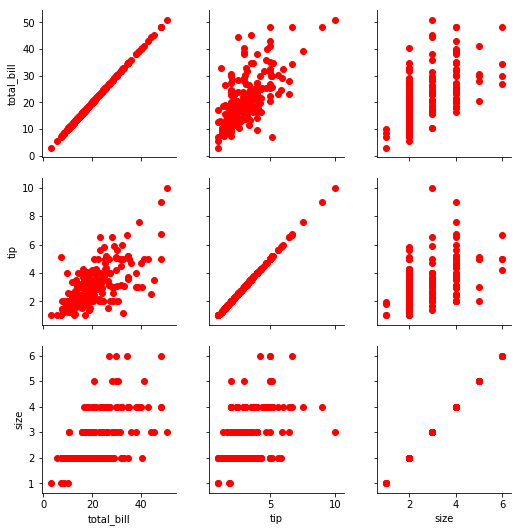

In [5]:
g = sns.PairGrid(tips)
g.map(plt.scatter, color='r')

Keďže mriežka zobrazuje symetrické dáta, možeme jej jednu časť použiť pre iný typ grafu.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


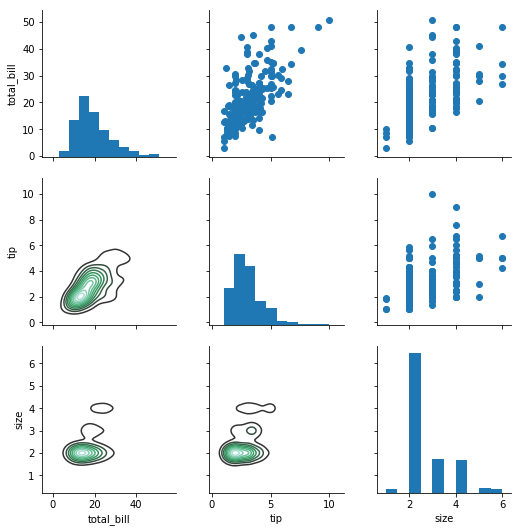

In [6]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

*pairplot* predstavuje jednoduchšiu verziu *PairGridu*.

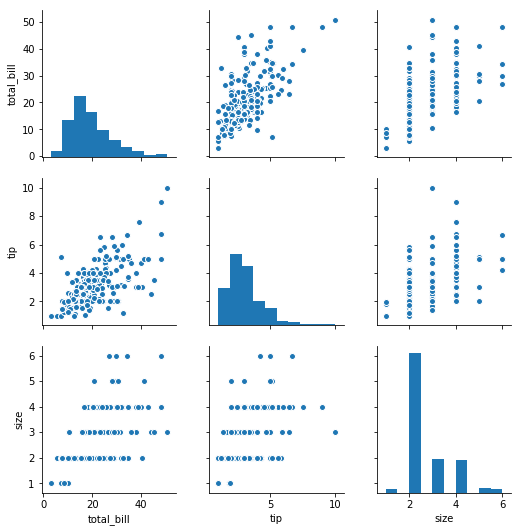

In [7]:
sns.pairplot(tips)

Ako sme si už zvykli, k dispozícii máme množstvo parametrov.

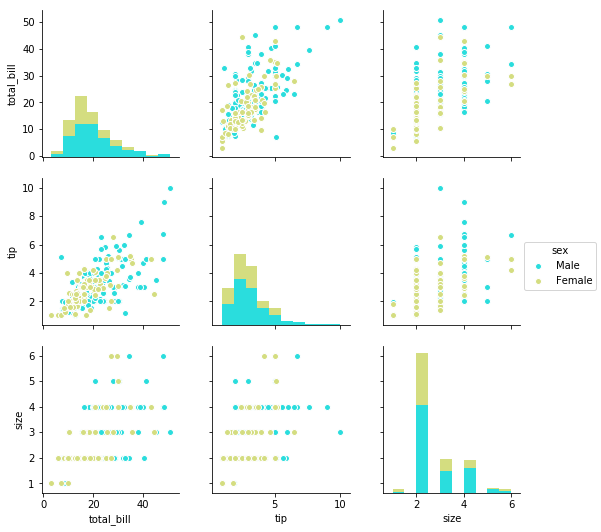

In [8]:
sns.pairplot(tips,hue='sex',palette='rainbow')

## Facet Grid

*FacetGrid* predstavuje zovšeobecnený prístup k tvorbe grafov na základe niektorej zvolenej charakteristiky.

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Pripravíme si mriežku.

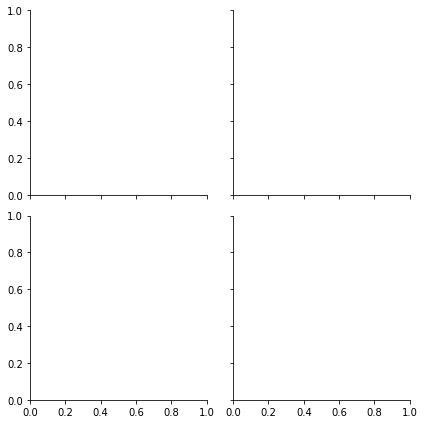

In [12]:
g = sns.FacetGrid(tips, col="time", row="smoker")

A vyberieme typ grafu, ktorý chceme použiť.

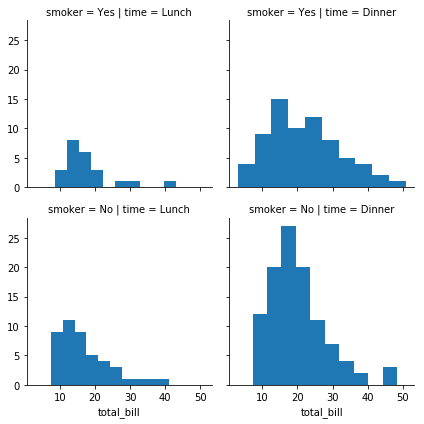

In [13]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

Opäť môžeme kombinovať rôzne parametre a docieliť veľmi užitočné vizualizácie bez toho, aby sme museli niečo programovať alebo predpripravovať dáta.

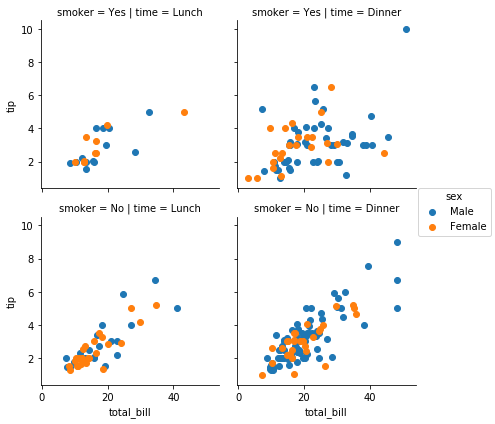

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

Nakoniec ešte uveďme *JointGrid*, zovšeobecnenú formu *jointplotu*.

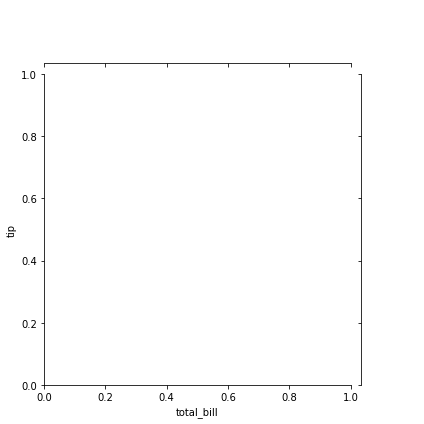

In [15]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


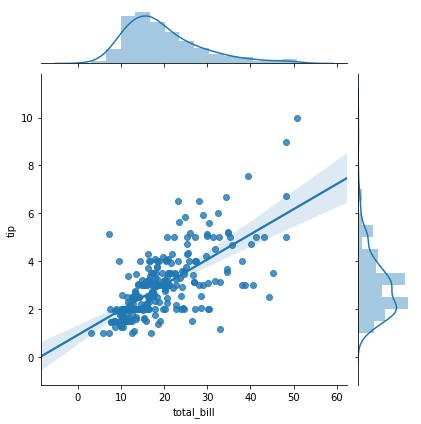

In [16]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Jeho využitie si predstavíme pri regresii. 